In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from collections import defaultdict
from surprise import SVD
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
phone1 = pd.read_csv('C:/Users/venu/phone_user_review_file_1.csv',encoding='latin-1')
phone2 = pd.read_csv('C:/Users/venu/phone_user_review_file_2.csv',encoding='latin-1')
phone3 = pd.read_csv('C:/Users/venu/phone_user_review_file_3.csv',encoding='latin-1')
phone4 = pd.read_csv('C:/Users/venu/phone_user_review_file_4.csv',encoding='latin-1')
phone5 = pd.read_csv('C:/Users/venu/phone_user_review_file_5.csv',encoding='latin-1')
phone6 = pd.read_csv('C:/Users/venu/phone_user_review_file_6.csv',encoding='latin-1')

In [3]:
phone1.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [4]:
phone1.shape

(374910, 11)

In [5]:
phone2.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/leagoo-lead-7/,4/15/2015,en,us,Amazon,amazon.com,2.0,10.0,"The telephone headset is of poor quality , not...",luis,Leagoo Lead7 5.0 Inch HD JDI LTPS Screen 3G Sm...
1,/cellphones/leagoo-lead-7/,5/23/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,This is my first smartphone so I have nothing ...,Mark Lavin,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
2,/cellphones/leagoo-lead-7/,4/27/2015,en,gb,Amazon,amazon.co.uk,8.0,10.0,Great phone. Battery life not great but seems ...,tracey,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
3,/cellphones/leagoo-lead-7/,4/22/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,Best 90 quid I've ever spent on a smart phone,Reuben Ingram,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
4,/cellphones/leagoo-lead-7/,4/18/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,I m happy with this phone.it s very good.thx team,viorel,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...


In [6]:
phone2.shape

(114925, 11)

In [7]:
phone3.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,11/7/2015,pt,br,Submarino,submarino.com.br,6.0,10.0,"recomendo, eu comprei um, a um ano, e agora co...",herlington tesch,Samsung Smartphone Samsung Galaxy S3 Slim G381...
1,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,10/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,Comprei um pouco desconfiada do site e do celu...,Luisa Silva Marieta,Samsung Smartphone Samsung Galaxy S3 Slim G381...
2,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,"Muito bom o produto, obvio que tem versÃµes me...",Cyrus,Samsung Smartphone Samsung Galaxy S3 Slim G381...
3,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,8.0,10.0,Unica ressalva fica para a camera que poderia ...,Marcela Santa Clara Brito,Samsung Smartphone Samsung Galaxy S3 Slim G381...
4,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/1/2015,pt,br,Colombo,colombo.com.br,8.0,10.0,Rapidez e atenÃ§Ã£o na entrega. O aparelho Ã© ...,Claudine Maria Kuhn Walendorff,"Smartphone Samsung Galaxy S3 Slim, Dual Chip, ..."


In [8]:
phone3.shape

(312961, 11)

In [9]:
phone4.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-s7262-duos-galaxy-ace/,3/11/2015,en,us,Amazon,amazon.com,2.0,10.0,was not conpatable with my phone as stated. I ...,Frances DeSimone,Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce...
1,/cellphones/samsung-s7262-duos-galaxy-ace/,17/11/2015,en,in,Zopper,zopper.com,10.0,10.0,Decent Functions and Easy to Operate Pros:- Th...,Expert Review,Samsung Galaxy Star Pro S7262 Black
2,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,4.0,10.0,Not Good Phone such price. Hang too much and v...,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
3,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,6.0,10.0,not bad for features,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
4,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,10.0,10.0,Excellent product,NHK,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)


In [10]:
phone4.shape

(98284, 11)

In [11]:
phone5.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,2.0,10.0,I bought 1 month before. currently speaker is ...,venkatesh,Karbonn K1616
1,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,6.0,10.0,"I just bought one week back, I have Airtel con...",Venkat,Karbonn K1616
2,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,4.0,10.0,one problem in this handset opera is not worki...,krrish,Karbonn K1616
3,/cellphones/karbonn-k1616/,4/25/2014,en,in,Naaptol,naaptol.com,10.0,10.0,here Karbonn comes up with an another excellen...,BRIJESH CHAUHAN,Karbonn K1616 - Black
4,/cellphones/karbonn-k1616/,4/23/2013,en,in,Naaptol,naaptol.com,10.0,10.0,"What a phone, all so on Naaptol my god 23% off...",Suraj CHAUHAN,Karbonn K1616 - Black


In [12]:
phone5.shape

(350216, 11)

In [13]:
phone6.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-instinct-sph-m800/,9/16/2011,en,us,Phone Arena,phonearena.com,8.0,10.0,I've had the phone for awhile and it's a prett...,ajabrams95,Samsung Instinct HD
1,/cellphones/samsung-instinct-sph-m800/,2/13/2014,en,us,Amazon,amazon.com,6.0,10.0,to be clear it is not the sellers fault that t...,Stephanie,Samsung SPH M800 Instinct
2,/cellphones/samsung-instinct-sph-m800/,12/30/2011,en,us,Phone Scoop,phonescoop.com,9.0,10.0,Well i love this phone. i have had ton of phon...,snickers,Instinct M800
3,/cellphones/samsung-instinct-sph-m800/,10/18/2008,en,us,HandCellPhone,handcellphone.com,4.0,10.0,I have had my Instinct for several months now ...,A4C,Samsung Instinct
4,/cellphones/samsung-instinct-sph-m800/,9/6/2008,en,us,Reviewed.com,reviewed.com,6.0,10.0,i have had this instinct phone for about two m...,betaBgood,Samsung Instinct


In [14]:
phone6.shape

(163837, 11)

In [15]:
phone1.head().T

,0,1,2,3,4
phone_url,/cellphones/samsung-galaxy-s8/,/cellphones/samsung-galaxy-s8/,/cellphones/samsung-galaxy-s8/,/cellphones/samsung-galaxy-s8/,/cellphones/samsung-galaxy-s8/
date,5/2/2017,4/28/2017,5/4/2017,5/2/2017,5/11/2017
lang,en,en,en,en,en
country,us,us,us,us,us
source,Verizon Wireless,Phone Arena,Amazon,Samsung,Verizon Wireless
domain,verizonwireless.com,phonearena.com,amazon.com,samsung.com,verizonwireless.com
score,10,10,6,9.2,4
score_max,10,10,10,10,10
extract,As a diehard Samsung fan who has had every Sam...,Love the phone. the phone is sleek and smooth ...,Adequate feel. Nice heft. Processor's still sl...,Never disappointed. One of the reasons I've be...,I've now found that i'm in a group of people t...
author,CarolAnn35,james0923,R. Craig,Buster2020,S Ate Mine


In [16]:
phone2.head().T

,0,1,2,3,4
phone_url,/cellphones/leagoo-lead-7/,/cellphones/leagoo-lead-7/,/cellphones/leagoo-lead-7/,/cellphones/leagoo-lead-7/,/cellphones/leagoo-lead-7/
date,4/15/2015,5/23/2015,4/27/2015,4/22/2015,4/18/2015
lang,en,en,en,en,en
country,us,gb,gb,gb,gb
source,Amazon,Amazon,Amazon,Amazon,Amazon
domain,amazon.com,amazon.co.uk,amazon.co.uk,amazon.co.uk,amazon.co.uk
score,2,10,8,10,10
score_max,10,10,10,10,10
extract,"The telephone headset is of poor quality , not...",This is my first smartphone so I have nothing ...,Great phone. Battery life not great but seems ...,Best 90 quid I've ever spent on a smart phone,I m happy with this phone.it s very good.thx team
author,luis,Mark Lavin,tracey,Reuben Ingram,viorel


In [17]:
phone3.head().T

,0,1,2,3,4
phone_url,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/
date,11/7/2015,10/2/2015,9/2/2015,9/2/2015,9/1/2015
lang,pt,pt,pt,pt,pt
country,br,br,br,br,br
source,Submarino,Submarino,Submarino,Submarino,Colombo
domain,submarino.com.br,submarino.com.br,submarino.com.br,submarino.com.br,colombo.com.br
score,6,10,10,8,8
score_max,10,10,10,10,10
extract,"recomendo, eu comprei um, a um ano, e agora co...",Comprei um pouco desconfiada do site e do celu...,"Muito bom o produto, obvio que tem versÃµes me...",Unica ressalva fica para a camera que poderia ...,Rapidez e atenÃ§Ã£o na entrega. O aparelho Ã© ...
author,herlington tesch,Luisa Silva Marieta,Cyrus,Marcela Santa Clara Brito,Claudine Maria Kuhn Walendorff


In [18]:
phone4.head().T

,0,1,2,3,4
phone_url,/cellphones/samsung-s7262-duos-galaxy-ace/,/cellphones/samsung-s7262-duos-galaxy-ace/,/cellphones/samsung-s7262-duos-galaxy-ace/,/cellphones/samsung-s7262-duos-galaxy-ace/,/cellphones/samsung-s7262-duos-galaxy-ace/
date,3/11/2015,17/11/2015,29/10/2015,29/10/2015,29/10/2015
lang,en,en,en,en,en
country,us,in,in,in,in
source,Amazon,Zopper,Amazon,Amazon,Amazon
domain,amazon.com,zopper.com,amazon.in,amazon.in,amazon.in
score,2,10,4,6,10
score_max,10,10,10,10,10
extract,was not conpatable with my phone as stated. I ...,Decent Functions and Easy to Operate Pros:- Th...,Not Good Phone such price. Hang too much and v...,not bad for features,Excellent product
author,Frances DeSimone,Expert Review,Amazon Customer,Amazon Customer,NHK


In [19]:
phone5.head().T

,0,1,2,3,4
phone_url,/cellphones/karbonn-k1616/,/cellphones/karbonn-k1616/,/cellphones/karbonn-k1616/,/cellphones/karbonn-k1616/,/cellphones/karbonn-k1616/
date,7/13/2016,7/13/2016,7/13/2016,4/25/2014,4/23/2013
lang,en,en,en,en,en
country,in,in,in,in,in
source,91 Mobiles,91 Mobiles,91 Mobiles,Naaptol,Naaptol
domain,91mobiles.com,91mobiles.com,91mobiles.com,naaptol.com,naaptol.com
score,2,6,4,10,10
score_max,10,10,10,10,10
extract,I bought 1 month before. currently speaker is ...,"I just bought one week back, I have Airtel con...",one problem in this handset opera is not worki...,here Karbonn comes up with an another excellen...,"What a phone, all so on Naaptol my god 23% off..."
author,venkatesh,Venkat,krrish,BRIJESH CHAUHAN,Suraj CHAUHAN


In [20]:
phone6.head().T

,0,1,2,3,4
phone_url,/cellphones/samsung-instinct-sph-m800/,/cellphones/samsung-instinct-sph-m800/,/cellphones/samsung-instinct-sph-m800/,/cellphones/samsung-instinct-sph-m800/,/cellphones/samsung-instinct-sph-m800/
date,9/16/2011,2/13/2014,12/30/2011,10/18/2008,9/6/2008
lang,en,en,en,en,en
country,us,us,us,us,us
source,Phone Arena,Amazon,Phone Scoop,HandCellPhone,Reviewed.com
domain,phonearena.com,amazon.com,phonescoop.com,handcellphone.com,reviewed.com
score,8,6,9,4,6
score_max,10,10,10,10,10
extract,I've had the phone for awhile and it's a prett...,to be clear it is not the sellers fault that t...,Well i love this phone. i have had ton of phon...,I have had my Instinct for several months now ...,i have had this instinct phone for about two m...
author,ajabrams95,Stephanie,snickers,A4C,betaBgood


## Data preprocessing

#### Merge the provided CSVs into one data-frame. 


In [21]:
phone_f=pd.concat([phone1,phone2,phone3,phone4,phone5,phone6],axis=0)

In [22]:
phone_copy = phone_f.copy()

#### Checking training dataset attributes datatypes 


In [23]:
phone_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415133 entries, 0 to 163836
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 129.6+ MB


#### after contact the datat sheets few observations and shape of the data-frame.

In [24]:
phone_f.shape

(1415133, 11)

In [25]:
phone_f.describe().T

,count,mean,std,min,25%,50%,75%,max
score,1351644.0,8.00706,2.616121,0.2,7.2,9.2,10.0,10.0
score_max,1351644.0,10.00000,0.000000,10.0,10.0,10.0,10.0,10.0


In [26]:
# This prints the columns with the number of null values they have
null_counts = phone_f.isnull().sum()
print (null_counts)

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64


In [27]:
# Check for missing values. Impute the missing values if there is any. 
# filling the null values in column 'score' and 'score_max' 
phone_f = phone_f.fillna(phone_f.median())

In [28]:
# dropping the null values in columns 'extract' ,'author' and 'product'
phone_f = phone_f.dropna()

In [29]:
#Round oﬀ scores to the nearest integers. 
phone_f['score'] = phone_f['score'].astype(int) 
phone_f['score_max'] = phone_f['score_max'].astype(int)

In [30]:
phone_f.shape

(1336416, 11)

In [31]:
#Check for duplicate values and remove them if there is any. 
phone_d=phone_f.drop_duplicates()

In [32]:
# Drop irrelevant features. Keep features like Author, Product, and Score. 
# we can drop phone_url,date,lang,country,source,domain and extract since they do not contribute in deciding popularity.  
phone_d.drop(['phone_url','date','lang','country','source','domain','score_max','extract'], axis = 1, inplace = True)

In [33]:
phone_vs = phone_d.copy()

In [34]:
phone_d.shape

(1331600, 3)

In [35]:
#Keep only 1000000 data samples. Use random state=612
df = phone_d.sample(n=1000000, random_state=612)

In [36]:
#Identify the most rated features.
#sorting on products that got highest mean score
df.groupby('product')['score'].mean().sort_values(ascending=False).head()

product
Nokia 5310 Xpress Music, sakura red sim-free unbranded kein Vertrag    10.0
Oppo Find 5 X909 16 Gb White Ð¡Ð¼Ð°ÑÑÑÐ¾Ð½                          10.0
Sony Ericsson W880i Prepay Mobile Phone On Orange                      10.0
Huawei Mobiltelefoner Mate 8 Dual SIM 32GB                             10.0
Huawei NOVA 4G MYSTIC SILVER                                           10.0
Name: score, dtype: float64

In [37]:
#Identify the users with most number of reviews. 
(df['author'].value_counts()).head()

Amazon Customer    57765
Cliente Amazon     14564
e-bit               6309
Client d'Amazon     5720
Amazon Kunde        3624
Name: author, dtype: int64

In [38]:
# The product that got most number of reviews.
df['product'].value_counts().head()

Lenovo Vibe K4 Note (White,16GB)     3908
Lenovo Vibe K4 Note (Black, 16GB)    3234
OnePlus 3 (Graphite, 64 GB)          3128
OnePlus 3 (Soft Gold, 64 GB)         2643
Huawei P8lite zwart / 16 GB          1994
Name: product, dtype: int64

In [39]:
# extracting authors who gave greater than 50 ratings
df1 = pd.DataFrame(columns=['author', 'a_count'])
df1['author']=df['author'].value_counts().index.tolist() 
df1['a_count'] = list(df['author'].value_counts() > 50)

In [40]:
# get names of indexes for which count column value is False
index_names = df1[ df1['a_count'] == False ].index 
# drop these row indexes from dataFrame 
df1.drop(index_names, inplace = True) 
df1

,author,a_count
0,Amazon Customer,True
1,Cliente Amazon,True
2,e-bit,True
3,Client d'Amazon,True
4,Amazon Kunde,True
...,...,...
674,kenankilic,True
675,cemdiler,True
676,Ralf,True
677,mircan,True


In [41]:
# extracting product that got more than 50 ratings

df2 = pd.DataFrame(columns=['product', 'p_count'])
df2['product']=df['product'].value_counts().index.tolist() 
df2['p_count'] = list(df['product'].value_counts() > 50)

In [42]:
# get names of indexes for which count column value is False

index_names = df2[ df2['p_count'] == False ].index 

# drop these row indexes from dataFrame 

df2.drop(index_names, inplace = True)

In [43]:
df2

,product,p_count
0,"Lenovo Vibe K4 Note (White,16GB)",True
1,"Lenovo Vibe K4 Note (Black, 16GB)",True
2,"OnePlus 3 (Graphite, 64 GB)",True
3,"OnePlus 3 (Soft Gold, 64 GB)",True
4,Huawei P8lite zwart / 16 GB,True
...,...,...
4341,Apple iPhone 6S 16GB,True
4342,Samsung Galaxy S6 Edge 32GB G925F Black,True
4343,Huawei Honor Pro,True
4344,Samsung Galaxy S6 Edge G925a 64GB Unlocked GSM...,True


In [44]:
# selecting data rows where product is having more than 50 ratings.

df3 = df[df['product'].isin(df2['product'])] 
df3

,score,author,product
104246,10,Paul B,Samsung i897 Captivate Android Smartphone Gala...
78693,10,Yuvraj,"Blu Win JR LTE (Grey, 4GB)"
8816,2,Joyce D. Pratt,"BLU Vivo XL Smartphone - 5.5"" 4G LTE - GSM Unl..."
116623,10,David B,Samsung S3350 Chat 335 Sim Free Mobile Phone
35333,10,Sebastian,"Samsung E1190 Handy (3,6 cm (1,43 Zoll) Displa..."
...,...,...,...
87173,8,Javier,Huawei Ascend Y330 - Smartphone libre Android ...
281625,8,Patrix,"Huawei Ascend G510 Smartphone Touch, Fotocamer..."
110881,2,Amazon Customer,"Apple iPhone 5C Factory Unlocked Cellphone, 8G..."
36197,10,majere1975,"Samsung Smartphone Galaxy S Advance, Display 4..."


In [45]:
# selecting data rows from df3 where author has given more than 50 ratings.
# so that we get the data with products having more than 50 ratings and users who have given more than 50 ratings

df4 = df3[df3['author'].isin(df1['author'])]
df4

,score,author,product
35333,10,Sebastian,"Samsung E1190 Handy (3,6 cm (1,43 Zoll) Displa..."
290678,8,sara,"Samsung SM-N910F Galaxy Note 4 Smartphone, 32 ..."
101404,10,ÐÐ²Ð³ÐµÐ½Ð¸Ð¹,Sony Xperia Z1 Compact (Ð»Ð°Ð¹Ð¼)
223332,8,Amazon Customer,Motorola Moto G 3rd Generation SIM-Free Smartp...
361379,10,e-bit,Smartphone Motorola Moto G 4 Play XT1603
...,...,...,...
21110,2,Amazon customer,Tracfone Motorola Moto E Android Prepaid Phone...
321740,8,Qantas,Sony Ericsson K810i Cyber-shot
269553,9,Capyto,Samsung M150 Cep Telefonu
87173,8,Javier,Huawei Ascend Y330 - Smartphone libre Android ...


In [46]:
# Report the shape of the final dataset.
df4.shape

(108983, 3)

# Build a popularity based model and recommend top 5 mobile phones

In [47]:
#calculating the mean score for a product by grouping it.
ratings_mean_count = pd.DataFrame(df.groupby('product')['score'].mean()) 

In [48]:
# calculating the number of ratings a product got
ratings_mean_count['rating_counts'] = pd.DataFrame(df.groupby('product')['score'].count()) 

In [49]:
# 3. Recommending the 5 mobile phones based in highest mean score and highest number of ratings the product got. 
ratings_mean_count.sort_values(by=['score','rating_counts'], ascending=[False,False]).head()

,score,rating_counts
product,,
Samsung Galaxy Note5,10.0,144
Nokia Smartphone Nokia Lumia 520 Desbloqueado Oi Preto Windows Phone 8 CÃ¢mera 5MP 3G Wi-Fi MemÃ³ria Interna 8G GPS,10.0,132
Motorola Smartphone Motorola Moto X Desbloqueado Preto Android 4.2.2 CÃ¢mera 10MP e Frontal 2MP MemÃ³ria Interna de 16GB GSM,10.0,131
Samsung Smartphone Galaxy Win Duos Branco Desbloqueado Dual Chip CÃ¢mera 5MP Processador Quad Core 1.2 Ghz Android 4.1 3G Wi- Fi e MemÃ³ria 8GB,10.0,127
Motorola Smartphone Motorola Moto G Dual Chip Desbloqueado TIM Android 4.3 Tela 4.5 8GB 3G Wi-Fi CÃ¢mera 5MP - Preto,10.0,126


In [50]:
data_pb = df
df

,score,author,product
104246,10,Paul B,Samsung i897 Captivate Android Smartphone Gala...
78693,10,Yuvraj,"Blu Win JR LTE (Grey, 4GB)"
109329,10,Pankaj Bhalla,"Lenovo P780 (Deep Black, 4GB)"
64164,6,Bgrazina,Samsung Galaxy XCover 2
8816,2,Joyce D. Pratt,"BLU Vivo XL Smartphone - 5.5"" 4G LTE - GSM Unl..."
...,...,...,...
70406,4,Dudls,Nokia 301 Dual
16189,8,Cintaaa__,LG Viewty KU990
99081,10,ALBERT M. MASSILLON,BLU Dash JR K Smartphone - Unlocked - Black
102484,2,Amazon Customer,Samsung Galaxy S6 SM-G920F 32GB (FACTORY UNLOC...


# Build a collaborative filtering model using SVD

In [51]:
# arranging columns in the order of user id,item id and rating to be fed in the svd
columns_titles = ['author','product','score']
vs_phone = phone_vs.reindex(columns=columns_titles)

In [52]:
# Keep only 5000 data samples. Use random state=612
vs_data = vs_phone.sample(n=5000, random_state=612)

In [53]:
#Build a collaborative filtering model using SVD. 
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(vs_data,reader = reader)

In [54]:
trainset = data.build_full_trainset()

In [55]:
trainset.ur

defaultdict(list,
            {0: [(0, 10.0)],
             1: [(1, 10.0)],
             2: [(2, 10.0)],
             3: [(3, 6.0)],
             4: [(4, 2.0)],
             5: [(5, 10.0)],
             6: [(6, 10.0), (1363, 10.0)],
             7: [(7, 10.0)],
             8: [(8, 8.0), (465, 9.0)],
             9: [(9, 8.0)],
             10: [(10, 10.0)],
             11: [(11, 2.0)],
             12: [(12, 8.0)],
             13: [(13, 8.0)],
             14: [(14, 10.0)],
             15: [(15, 10.0)],
             16: [(16, 2.0)],
             17: [(17, 8.0)],
             18: [(18, 10.0)],
             19: [(19, 9.0)],
             20: [(20, 8.0)],
             21: [(21, 10.0),
              (909, 9.0),
              (2202, 6.0),
              (2551, 10.0),
              (3378, 9.0),
              (3614, 10.0)],
             22: [(22, 2.0)],
             23: [(23, 10.0)],
             24: [(24, 8.0)],
             25: [(25, 10.0)],
             26: [(26, 10.0)],
             27:

In [56]:
algo = SVD()
algo.fit(trainset)

In [57]:
# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()

In [58]:
predictions = algo.test(testset)

In [59]:
predictions

[Prediction(uid='Paul B', iid='Blu Win JR LTE (Grey, 4GB)', r_ui=8.0086, est=8.593677358616926, details={'was_impossible': False}),
 Prediction(uid='Paul B', iid='Lenovo P780 (Deep Black, 4GB)', r_ui=8.0086, est=8.471948111930708, details={'was_impossible': False}),
 Prediction(uid='Paul B', iid='Samsung Galaxy XCover 2', r_ui=8.0086, est=7.945541443208839, details={'was_impossible': False}),
 Prediction(uid='Paul B', iid='BLU Vivo XL Smartphone - 5.5" 4G LTE - GSM Unlocked - Solid Gold', r_ui=8.0086, est=7.923522505216453, details={'was_impossible': False}),
 Prediction(uid='Paul B', iid='Samsung S3350 Chat 335 Sim Free Mobile Phone', r_ui=8.0086, est=8.284205508903442, details={'was_impossible': False}),
 Prediction(uid='Paul B', iid='Samsung E1190 Handy (3,6 cm (1,43 Zoll) Display, Dual-Band) titan gray', r_ui=8.0086, est=8.43459227361591, details={'was_impossible': False}),
 Prediction(uid='Paul B', iid='LG Nexus 4 Smartphone, Nero [Italia]', r_ui=8.0086, est=8.615673025037463, det

In [60]:
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [61]:
#Try and recommend top 5 products for test users
top_n = get_top_n(predictions, n=5)

In [62]:
top_n 

defaultdict(list,
            {'Paul B': [('Lenovo Motorola Moto G 4G (2 Generazione) Smartphone, Display 5 Pollici, LTE, Fotocamera 8 MP, Memoria 8 GB, Android 5 Lollipop, Nero [Italia]',
               8.979355927689628),
              ('OnePlus 3 (Graphite, 64 GB)', 8.974192196403342),
              ('Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G)',
               8.93444056623332),
              ('OnePlus 3T (Soft Gold, 6GB RAM + 64GB memory)',
               8.888963038636822),
              ('Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco',
               8.873418334922142)],
             'Yuvraj': [('OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)',
               9.013342242669081),
              ('Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G)',
               8.973714854695395),
              ('Lenovo Motorola Moto G Smartphone, 4,5 pollici display

In [63]:
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

Paul B ['Lenovo Motorola Moto G 4G (2 Generazione) Smartphone, Display 5 Pollici, LTE, Fotocamera 8 MP, Memoria 8 GB, Android 5 Lollipop, Nero [Italia]', 'OnePlus 3 (Graphite, 64 GB)', 'Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G)', 'OnePlus 3T (Soft Gold, 6GB RAM + 64GB memory)', 'Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco']
Yuvraj ['OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)', 'Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G)', 'Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]', 'Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco', 'Samsung Galaxy S7 edge 32GB (T-Mobile)']
Pankaj Bhalla ['Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, 

# Collaborative filtering using KNN

In [68]:
# arranging columns in the order of user id,item id and rating to be fed 
columns_titles = ['author','product','score']
vs_phone = phone_vs.reindex(columns=columns_titles)

In [69]:
# Keep only 5000 data samples. Use random state=612
vs_data = vs_phone.sample(n=5000, random_state=612)

In [70]:
# Read dataset.
reader = Reader(rating_scale=(1, 10))
data_I = Dataset.load_from_df(vs_data,reader = reader)

In [71]:
trainset_I, testset_I = train_test_split(data_I, test_size=.15)

In [72]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset_I)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [73]:
# run the  model against the testset

test_pred_I = algo.test(testset_I)

In [74]:
test_pred_I

[Prediction(uid='twipanda ', iid='LG P990', r_ui=10.0, est=8.011058823529412, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='MR. A. Uddin', iid='Samsung Ch@t 335 Qwerty Mobile Phone (White)', r_ui=10.0, est=8.011058823529412, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Ð\x9fÐ°Ð²ÐµÐ»', iid='Huawei Ascend G700-U20', r_ui=8.0, est=8.011058823529412, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Yash', iid='OnePlus X (Onyx, 16GB)', r_ui=2.0, est=8.011058823529412, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='taleban', iid='Lenovo Motorola Moto G 4G (2 Generazione) Smartphone, Display 5 Pollici, LTE, Fotocamera 8 MP, Memoria 8 GB, Android 5 Lollipop, Nero [Italia]', r_ui=10.0, est=8.011058823529412, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Cristina

In [75]:
#Get RMSE value
print("Item-based Model : Test Set")
accuracy.rmse(test_pred_I, verbose=True)



Item-based Model : Test Set
RMSE: 2.5750


2.5750184227478528

# KNN - User based model

In [76]:
reader = Reader(rating_scale=(1, 10))
data_U = Dataset.load_from_df(vs_data,reader = reader)

In [77]:
trainset_U, testset_U = train_test_split(data_U, test_size=.15)

In [78]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset_U)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [79]:
# query for specific predicions
uid = 'Frances DeSimone'  # raw user id
iid = 'Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce.'  # raw item id

In [80]:
#Get a prediction for specific users and items.
pred = algo.predict(uid, iid, verbose=True)

user: Frances DeSimone item: Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce. r_ui = None   est = 8.03   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


In [81]:
# run the trained model against the testset
test_pred_U = algo.test(testset_U)

In [82]:
#Predict score (average rating) for test users
test_pred_U

[Prediction(uid='Colosus', iid='Nokia : SÃ\x83Â\xad 7210 Supernova', r_ui=10.0, est=8.026823529411764, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Sole', iid='Sony Xperia M2 - Smartphone libre Android (Pantalla 4.8", cÃ¡mara 8 Mp, 8 GB, Quad-Core 1.2 GHz, 1024 MB RAM), pÃºrpura (importado)', r_ui=10.0, est=8.026823529411764, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid="Client d'Amazon", iid='Access-Discount SAMSUNG GALAXY J3 2016 coque silicone Gel TPU + FILM PROTECTION Ecran en VERRE TrempÃ© Galaxy J3 (2016) J320F J3-6', r_ui=2.0, est=8.0, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='Markus Goy', iid='Toshiba TG01 Weiss o2', r_ui=10.0, est=8.026823529411764, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Susana', iid='Sony Xperia Z - Smartphone libre Android (pantalla 5", cÃ¡mara 13.1 Mp, 16 GB, 1.5 GHz, 2 GB RAM), mor

In [83]:
# Evaluate the collaborative model. Print RMSE value for User Based CF
print("User-based Model : Test Set")
accuracy.rmse(test_pred_U, verbose=True)

User-based Model : Test Set
RMSE: 2.7489


2.748920417988024

In [84]:
d_df = df
df.shape

(1000000, 3)

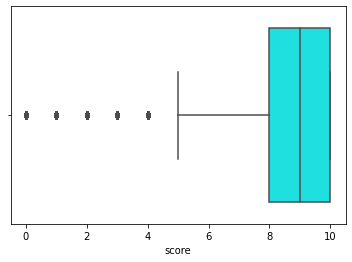

Boxplot of score
Q1 is :  8.0
Q2 is :  9.0
Q3 is :  10.0
IQR is: 2.0
Lower Whisker, Upper Whisker :  5.0 , 13.0
number of outliers are: 147884


In [85]:
#Check for outliers and impute them as required. 
# only score is the column which is numeric so we check it for outliers.
#Checking for outliers in the sample of 1000000
sns.boxplot(x= d_df['score'], color='cyan')
plt.show()
print('Boxplot of score')
#calculating the outiers in attribute 
Q1 = d_df['score'].quantile(0.25)
Q2 = d_df['score'].quantile(0.50)
Q3 = d_df['score'].quantile(0.75) 
IQR = Q3 - Q1
L_W = (Q1 - 1.5 *IQR)
U_W = (Q3 + 1.5 *IQR)    
print('Q1 is : ',Q1)
print('Q2 is : ',Q2)
print('Q3 is : ',Q3)
print('IQR is:',IQR)
print('Lower Whisker, Upper Whisker : ',L_W,',',U_W)
bools = (d_df['score'] < (Q1 - 1.5 *IQR)) |(d_df['score'] > (Q3 + 1.5 * IQR))
print('number of outliers are:',bools.sum())   #calculating the number of outliers

In [86]:
# function to treat outliers
#Removing outliers by removing data below lower whisker and above upper whisker
Q1 = d_df['score'].quantile(0.25)
Q3 = d_df['score'].quantile(0.75)
IQR = Q3 - Q1
d_df = d_df[(d_df['score'] > (Q1 - 1.5 *IQR)) & (d_df['score'] < (Q3 + 1.5 *IQR))]
bools = (d_df['score'] < (Q1 - 1.5 *IQR)) |(d_df['score'] > (Q3 + 1.5 * IQR))
print('number of outliers are:',bools.sum())   #calculating the number of outliers
d_df.shape

number of outliers are: 0


(848829, 3)

In [87]:
#Try cross validation techniques to get better results.
cross_validate(algo,data_U, measures=['RMSE'], cv=3, verbose=False)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


{'test_rmse': array([2.6124063 , 2.66419042, 2.57131018]),
 'fit_time': (0.46167993545532227, 0.519068717956543, 0.44172215461730957),
 'test_time': (0.025966405868530273,
  0.040971994400024414,
  0.021970272064208984)}

 Report your findings and inferences. Samsung Galaxy Note5 is the most popular product Amazon Customer is the most active author who writes reviews. Lenovo Vibe K4 Note (White,16GB) was rated by most of the authors CV rmse was 2.6

1)In what business scenario you should use CF based Recommendation Systems ? 

Ans...)

Collaborative Filtering is used to building intelligent recommender systems that can learn to give better recommendations as more information about users is collected. It isa personalised recommender system , recommendations are made based on the past behaviour of the user. Most websites like Amazon, YouTube, and Netflix use collaborative filtering as a part of their sophisticated recommendation system.

2)In what business scenario you should use popularity based Recommendation Systems ? 

Ans... )

Popularity based recommendation system relies on the popularity,trends and frequency counts of which items were most purchased.It is used buy the travel companies selling holiday packages in a season, by Google News and other news websites to show Top Stories with images.

3)What other possible methods can you think of which can further improve the recommendation for diﬀerent users ?

Ans...)

Apart from Popularity and Collaborative Filtering , Content-based, Demographic, Utility based, Knowledge based and Hybrid recommendation system can be used as per the user needs.

# summary

This works best if a business to start with initally. This recommendation system will help the users get a good recommendation to start with and once the buyers have a purchased history, the recommendation engine can use the model based collaborative filtering technique.